In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 标量的基本情况，变量名称、描述和类型
pd.read_excel("./data/Data Dictionary.xls")

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


In [3]:
pd.read_excel("./data/数据属性.xlsx")

,变量名字,描述,类型
0,SeriousDlqin2yrs,好坏客户,Y/N
1,RevolvingUtilizationOfUnsecuredLines,信用卡和个人信用额度的总余额，除了房地产和没有分期付款债务，如汽车贷款除以信用额度,percentage
2,age,出生年龄,integer
3,NumberOfTime30-59DaysPastDueNotWorse,过去两年借款35-59天逾期但是不糟糕的次数,integer
4,DebtRatio,每月债务支付、赡养费、生活费用除以毛利,percentage
5,MonthlyIncome,月收入,real
6,NumberOfOpenCreditLinesAndLoans,开放式贷款（分期付款汽车贷款或抵押贷款）和信用额度（信用卡）的次数,integer
7,NumberOfTimes90DaysLate,>= 90天逾期,integer
8,NumberRealEstateLoansOrLines,抵押贷款和房地产贷款包括房屋净值信贷额度,integer
9,NumberOfTime60-89DaysPastDueNotWorse,过去两年借款60-89天逾期但是不糟糕的次数,integer


In [4]:
df = pd.read_csv("./data/cs-training.csv").drop("Unnamed: 0", axis=1)

In [5]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

通过 info() 可以看出一共有150000条信息，MonthyIncome 和 NumberOfDependents 存在缺失的情况，MonthyIncome 缺失29731个数据，NumberOfDependents 缺失3924个数据。

下面使用 describe() 来看数据集中的计数、均值、最大最小值、标准差和第一、二、三个四分位值，同时增加了缺失率的计算

In [7]:
df.describe().T.assign(missing_rate = df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_rate
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0,0.000000
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0,0.000000
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0,0.000000
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0,0.000000
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0,0.198207
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0,0.000000
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0,0.000000
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0,0.000000
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0,0.000000


### 缺失值处理：
    1、由于 MonthyIncome 缺失较多，因此不适合直接进行删除，这边根据变量之间存在的关系来填补缺失值，并采用随机森林的方法；
    
    2、NumberOfDependents 的缺失较少，对于整体的样本影响有限，因此这边直接进行删除操作，后续也可以进行一些其他的填补操作。

In [8]:
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 把已有的数值型特征取出来
    process_df = df.iloc[:, [5,0,1,2,3,4,6,7,8,9]]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.MonthlyIncome.notnull()].values
    unknown = process_df[process_df.MonthlyIncome.isnull()].values
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.MonthlyIncome.isnull()), 'MonthlyIncome'] = predicted
    return df

In [9]:
df = set_missing(df)

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [10]:
df = df.dropna() # 删除缺失值

In [11]:
df = df.drop_duplicates() # 删除重复值

### 异常值处理：
    异常值：偏离大多数抽样数据的数值，通常指测定值中与平均值的偏差超过两倍标准差的测定值
    
    通常采用离群值检测的方法对异常值进行检测

**RevolvingUtilizationOfUnsecuredLines**

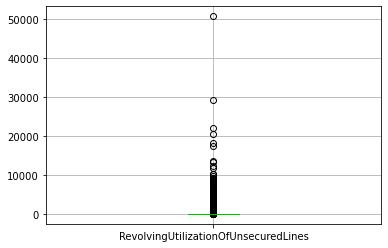

In [12]:
df["RevolvingUtilizationOfUnsecuredLines"].plot(kind="box", grid=True)

In [13]:
# 使用2来代替大于2的值
revNew = []
for val in df.RevolvingUtilizationOfUnsecuredLines:
    if val <= 2:
        revNew.append(val)
    else:
        revNew.append(2.)

In [14]:
df.RevolvingUtilizationOfUnsecuredLines = revNew

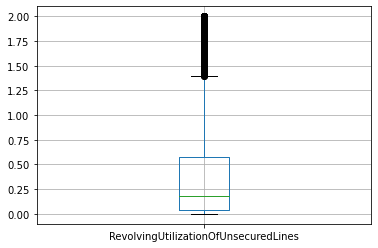

In [15]:
df["RevolvingUtilizationOfUnsecuredLines"].plot(kind="box",grid=True)

**age**

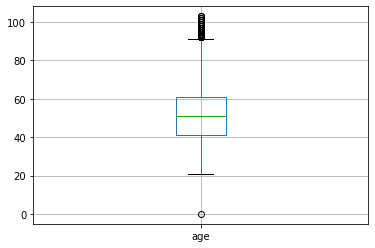

In [16]:
df.age.plot.box(grid=True)

In [17]:
# 发现 age 属性中存在0值情况，而这些数据明显是异常值，因此对其进行处理
df = df[df["age"] > 0]

**NumberOfTime30-59DaysPastDueNotWorse**

**NumberOfTime60-89DaysPastDueNotWorse**

**NumberOfTimes90DaysLate**

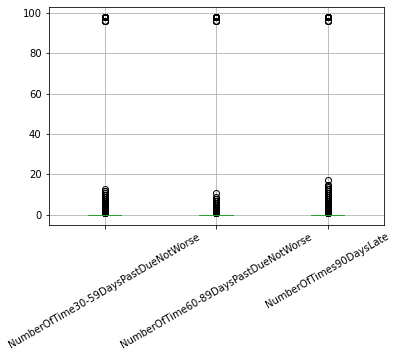

In [18]:
df.boxplot(column=["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTimes90DaysLate"], 
            rot=30)

上面的箱线图可以看出 NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate三个特征都存在两个异常值，下面使用 unique() 方法查看具体的异常值

In [19]:
print("NumberOfTime30-59DaysPastDueNotWorse:", df["NumberOfTime30-59DaysPastDueNotWorse"].unique())
print("NumberOfTime60-89DaysPastDueNotWorse:", df["NumberOfTime60-89DaysPastDueNotWorse"].unique())
print("NumberOfTimes90DaysLate:", df["NumberOfTimes90DaysLate"].unique())

NumberOfTime30-59DaysPastDueNotWorse: [ 2  0  1  3  5  4  7 10  6 98 12  8  9 96 13 11]
NumberOfTime60-89DaysPastDueNotWorse: [ 0  1  2  5 98  4  3  6  7  8 11  9 96]
NumberOfTimes90DaysLate: [ 0  1  3  2  4 98 10  5  6  7  8  9 15 11 96 13 14 17 12]


In [20]:
def replaceOutlier(data):
    New = []
    med = data.median()
    for val in data:
        if ((val == 98) | (val == 96)):
            New.append(med)
        else:
            New.append(val)
    return New

df["NumberOfTime30-59DaysPastDueNotWorse"] = replaceOutlier(df["NumberOfTime30-59DaysPastDueNotWorse"])
df["NumberOfTime60-89DaysPastDueNotWorse"] = replaceOutlier(df["NumberOfTime60-89DaysPastDueNotWorse"])
df["NumberOfTimes90DaysLate"] = replaceOutlier(df["NumberOfTimes90DaysLate"])

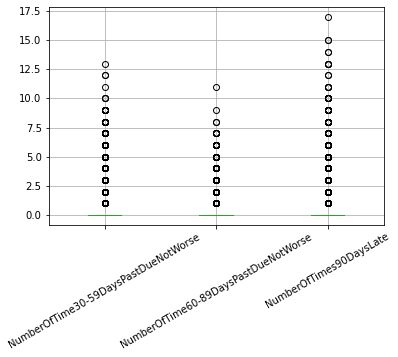

In [21]:
# 下图可以看出 NumberOfTime30-59DaysPastDueNotWorse 删除 98 和 96 两个异常值时，
# NumberOfTime60-89DaysPastDueNotWorse 和 NumberOfTimes90DaysLate 的两个异常值也同时删除了
df.boxplot(column=["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTimes90DaysLate"], 
            rot=30)
plt.show()

**DebtRatio**

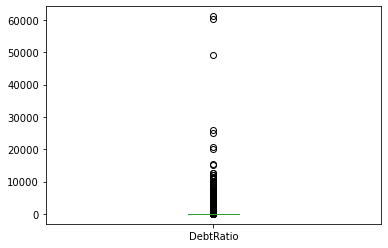

In [22]:
df["DebtRatio"].plot(kind="box")

In [23]:
# 使用中位数绝对偏差 MAD（median absolute deviation）方法进行异常值的检测
from scipy.stats import norm

def mad_based_outlier(points, thresh=3.5):
    if type(points) is list:
        points = np.asarray(points)
    if len(points.shape) == 1:
        points = points[:, None]
    med = np.median(points, axis=0)
    abs_dev = np.absolute(points - med)
    med_abs_dev = np.median(abs_dev)

    mod_z_score = norm.ppf(0.75) * abs_dev / med_abs_dev
    return mod_z_score > thresh

In [24]:
# 检测出最小的异常值,用于替换异常值
minUpperBound = min([val for (val, out) in zip(df.DebtRatio, mad_based_outlier(df.DebtRatio)) if out == True])

In [25]:
minUpperBound

1.159671533

In [26]:
newDebtRatio = []
for val in df.DebtRatio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)

df.DebtRatio = newDebtRatio

In [27]:
df.DebtRatio.describe()

count    120169.000000
mean          0.356675
std           0.293965
min           0.000000
25%           0.143842
50%           0.296171
75%           0.482710
max           1.159672
Name: DebtRatio, dtype: float64

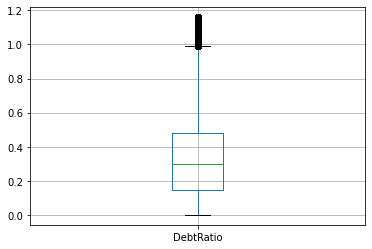

In [28]:
df["DebtRatio"].plot.box(grid=True)

**Monthly income**

In [29]:
df.MonthlyIncome.describe()

count    1.201690e+05
mean     6.675104e+03
std      1.438964e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.250000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

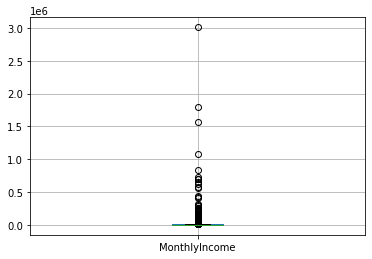

In [30]:
df.MonthlyIncome.plot.box(grid=True)

In [31]:
sum(mad_based_outlier(df.MonthlyIncome))

array([3408])

In [32]:
minUpperBound_MonthlyIncome = min([val for (val, out) in zip(
    df.MonthlyIncome, mad_based_outlier(df.MonthlyIncome)) if out == True])

In [33]:
newMonthlyIncome = []
for val in df.MonthlyIncome:
    if val > minUpperBound_MonthlyIncome:
        newMonthlyIncome.append(minUpperBound_MonthlyIncome)
    else:
        newMonthlyIncome.append(val)

df.MonthlyIncome = newMonthlyIncome

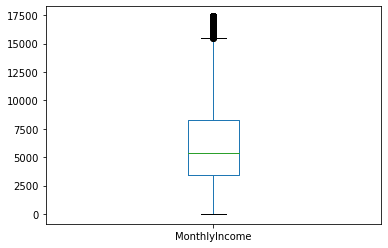

In [34]:
df.MonthlyIncome.plot.box()

**NumberOfOpenCreditLinesAndLoans**

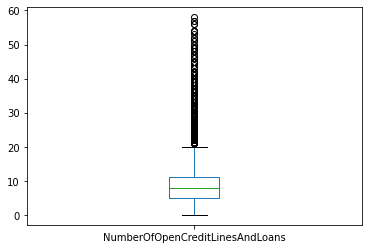

In [35]:
df["NumberOfOpenCreditLinesAndLoans"].plot(kind="box")

In [36]:
minUpperBound_NumberOfOpenCreditLinesAndLoans = min([val for (val, out) in zip(df.NumberOfOpenCreditLinesAndLoans, mad_based_outlier(df.NumberOfOpenCreditLinesAndLoans)) if out == True])

In [37]:
newNumberOfOpenCreditLinesAndLoans = []
for val in df.NumberOfOpenCreditLinesAndLoans:
    if val > minUpperBound_NumberOfOpenCreditLinesAndLoans:
        newNumberOfOpenCreditLinesAndLoans.append(minUpperBound_NumberOfOpenCreditLinesAndLoans)
    else:
        newNumberOfOpenCreditLinesAndLoans.append(val)

df.NumberOfOpenCreditLinesAndLoans = newNumberOfOpenCreditLinesAndLoans

In [38]:
df.NumberOfOpenCreditLinesAndLoans.describe()

count    120169.000000
mean          8.710142
std           4.950273
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          24.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

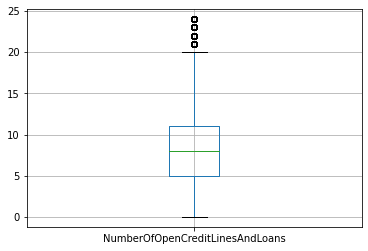

In [39]:
df["NumberOfOpenCreditLinesAndLoans"].plot(kind="box", grid=True)

**NumberRealEstateLoansOrLines**

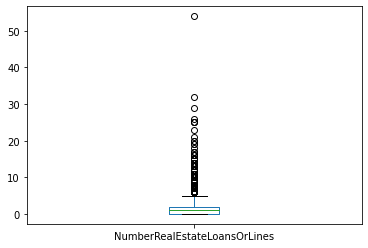

In [40]:
df["NumberRealEstateLoansOrLines"].plot(kind="box")

In [41]:
realNew = []
for val in df.NumberRealEstateLoansOrLines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)

df.NumberRealEstateLoansOrLines = realNew

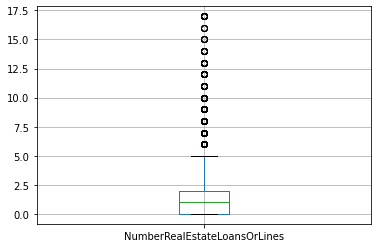

In [42]:
df["NumberRealEstateLoansOrLines"].plot(kind="box", grid=True)

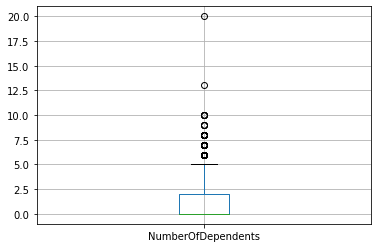

In [43]:
df.NumberOfDependents.plot.box(grid=True)

In [44]:
depNew = []
for var in df.NumberOfDependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)

df.NumberOfDependents = depNew

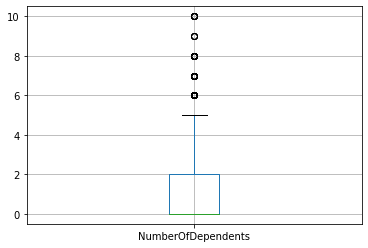

In [45]:
df.NumberOfDependents.plot.box(grid=True)

### 数据切分
    将数据进行切分，分成训练集和测试集两部分

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
Y = df["SeriousDlqin2yrs"]
X = df.iloc[:, 1:]
# 测试和训练数据进行3：7的比例进行切分 random_state定一个值是的每次运行的时候不会被随机分
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

train = pd.concat([Y_train, X_train], axis=1)
test = pd.concat([Y_test, X_test], axis=1)

train.to_csv('TrainData.csv',index=False)
test.to_csv('TestData.csv',index=False)

### 探索性数据分析
    一般采用直方图、散点图和箱线图等来进行分析

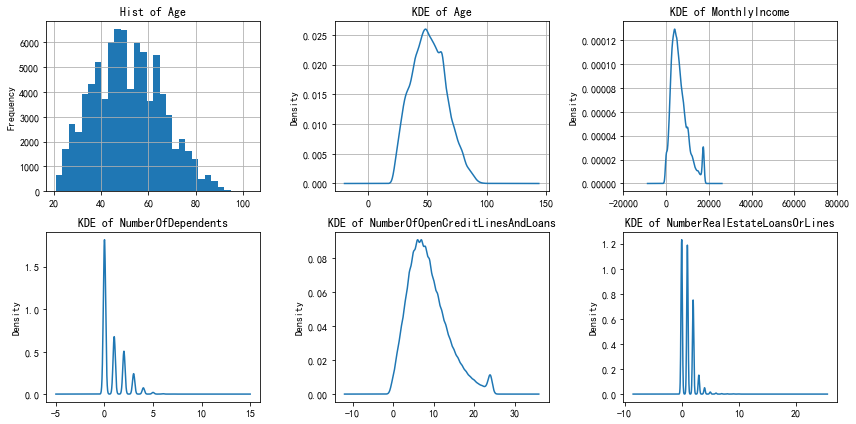

In [50]:
# 下面利用直方图和核密度估计画图，Age、MonthlyIncome、NumberOfOpenCreditLinesAndLoans大致呈正太分布，符合统计分析

fig = plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((2, 3), (0, 0))
train["age"].plot(kind="hist", bins=30, figsize=(12, 6), grid=True)
plt.title("Hist of Age")

plt.subplot2grid((2, 3), (0, 1))
train["age"].plot(kind="kde", grid=True)
plt.title("KDE of Age")

plt.subplot2grid((2, 3), (0, 2))
train["MonthlyIncome"].plot(kind="kde", grid=True)
plt.xlim(-20000, 80000)
plt.title("KDE of MonthlyIncome")

plt.subplot2grid((2, 3), (1, 0))
train["NumberOfDependents"].plot(kind="kde")
plt.title("KDE of NumberOfDependents")

plt.subplot2grid((2, 3), (1, 1))
train["NumberOfOpenCreditLinesAndLoans"].plot(kind="kde")
plt.title("KDE of NumberOfOpenCreditLinesAndLoans")

plt.subplot2grid((2, 3), (1, 2))
train["NumberRealEstateLoansOrLines"].plot(kind="kde")
plt.title("KDE of NumberRealEstateLoansOrLines")

# 解决中文的显示问题
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

plt.tight_layout() # 调整子图之间的间距，紧凑显示图像
plt.show()

### 特征选择
    变量分箱：
    
        将连续变量离散化
           
        将多状态的离散变量合并成少状态
              
    变量分箱的重要性：
    
        1、稳定性：避免特征中无意义的波动对评分带来波动
        
        2、健壮性：避免极端值的影响
        
     变量分箱的优势：
     
         1、可以将缺失值作为一个独立的箱带入模型中
         
         2、将所有的变量变换到相似的尺度上
         
     变量分箱的劣势：
     
         1、计算量大
         
         2、分箱之后需要编码
      
     变量分箱常用的方法：
     
         有监督的：
            
            1、Best-KS； 2、ChiMerge（卡方分箱法）
        
         无监督的：
            
            1、等距； 2、等频； 3、聚类

In [51]:
import scipy.stats.stats as stats

# 自定义自动分箱函数
def mono_bin(Y, X, n=20):
    r = 0
    good = Y.sum()
    bad = Y.count() - good
    while np.abs(r) < 1:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X.rank(method="first"), n)}) # X.rank(method="first")
        d2 = d1.groupby("Bucket", as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y) # 使用斯皮尔曼等级相关系数来评估两个变量之间的相关性
        n = n - 1
    d3 = pd.DataFrame(d2.X.min(), columns = ['min'])
    d3['min']=d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate'] / (1-d3['rate'])) / (good/bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min'))
    print(d4)
    cut=[]
    cut.append(float('-inf'))
    for i in range(1, n+1):
        qua = X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    woe = list(d4['woe'].round(3))
    return d4, iv, cut, woe

In [52]:
# 自定义分箱函数
def self_bin(Y, X, cat):
    good = Y.sum()
    bad = Y.count() - good
    d1 = pd.DataFrame({'X': X, 'Y': Y,'Bucket': pd.cut(X, cat)})
    d2 = d1.groupby('Bucket', as_index = True)
    d3 = pd.DataFrame(d2.X.min(), columns=['min'])
    d3['min'] = d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate'] / (1 - d3['rate'])) / (good / bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min'))
    print(d4)
    woe = list(d4['woe'].round(3))
    return d4, iv, woe

In [53]:
dfx1, ivx1, cutx1, woex1 = mono_bin(train.SeriousDlqin2yrs, train.RevolvingUtilizationOfUnsecuredLines, n=10)

                          min       max   sum  total      rate       woe  \
Bucket                                                                     
(0.999, 21030.25]    0.000000  0.034898   440  21030  0.020922 -1.250802   
(21030.25, 42059.5]  0.034899  0.177117   499  21029  0.023729 -1.122053   
(42059.5, 63088.75]  0.177143  0.578850  1128  21029  0.053640 -0.275340   
(63088.75, 84118.0]  0.578865  2.000000  3776  21030  0.179553  1.075605   

                     goodattribute  badattribute  
Bucket                                            
(0.999, 21030.25]         0.075304      0.263047  
(21030.25, 42059.5]       0.085401      0.262280  
(42059.5, 63088.75]       0.193052      0.254245  
(63088.75, 84118.0]       0.646243      0.220428  


In [54]:
dfx2, ivx2, cutx2, woex2 = mono_bin(train.SeriousDlqin2yrs, train.age, n=10)

                        min  max   sum  total      rate       woe  \
Bucket                                                              
(0.999, 9347.333]        21   33  1041   9347  0.111373  0.518188   
(9347.333, 18693.667]    33   39   904   9346  0.096726  0.360839   
(18693.667, 28040.0]     39   44   843   9347  0.090189  0.283659   
(28040.0, 37386.333]     44   49   739   9346  0.079071  0.139951   
(37386.333, 46732.667]   49   53   720   9346  0.077038  0.111699   
(46732.667, 56079.0]     53   58   609   9347  0.065155 -0.068634   
(56079.0, 65425.333]     58   63   465   9346  0.049754 -0.354648   
(65425.333, 74771.667]   63   70   285   9346  0.030494 -0.864262   
(74771.667, 84118.0]     70  103   237   9347  0.025356 -1.054084   

                        goodattribute  badattribute  
Bucket                                               
(0.999, 9347.333]            0.178162      0.106113  
(9347.333, 18693.667]        0.154715      0.107851  
(18693.667, 28040.0]    

In [55]:
pinf = float('inf') # 正无穷大
ninf = float('-inf') # 负无穷大

In [56]:
cutx3 = [ninf, 0, 1, 3, 5, pinf]
dfx3, ivx3, woex3 = self_bin(train.SeriousDlqin2yrs, train["NumberOfTime30-59DaysPastDueNotWorse"], cutx3)

             min   max   sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]  0.0   0.0  2975  70030  0.042482 -0.520285       0.509156   
(0.0, 1.0]   1.0   1.0  1418   9468  0.149768  0.858559       0.242684   
(1.0, 3.0]   2.0   3.0  1092   3830  0.285117  1.675767       0.186890   
(3.0, 5.0]   4.0   5.0   283    631  0.448494  2.388228       0.048434   
(5.0, inf]   6.0  13.0    75    159  0.471698  2.481655       0.012836   

             badattribute  
Bucket                     
(-inf, 0.0]      0.856659  
(0.0, 1.0]       0.102843  
(1.0, 3.0]       0.034979  
(3.0, 5.0]       0.004446  
(5.0, inf]       0.001073  


In [57]:
df.DebtRatio.describe()

count    120169.000000
mean          0.356675
std           0.293965
min           0.000000
25%           0.143842
50%           0.296171
75%           0.482710
max           1.159672
Name: DebtRatio, dtype: float64

In [58]:
dfx4, ivx4, cutx4, woex4 = mono_bin(train.SeriousDlqin2yrs, train.DebtRatio, n=20)

                  min       max   sum  total      rate  woe  goodattribute  \
Bucket                                                                       
(0.999, 84118.0]  0.0  1.159672  5843  84118  0.069462  0.0            1.0   

                  badattribute  
Bucket                          
(0.999, 84118.0]           1.0  


In [59]:
dfx5, ivx5, cutx5, woex5 = mono_bin(train.SeriousDlqin2yrs, train.MonthlyIncome, n=10)

                       min      max   sum  total      rate       woe  \
Bucket                                                                 
(0.999, 14020.5]       0.0   2700.0  1284  14020  0.091583  0.300531   
(14020.5, 28040.0]  2700.0   4000.0  1243  14020  0.088659  0.264865   
(28040.0, 42059.5]  4000.0   5400.0  1058  14019  0.075469  0.089419   
(42059.5, 56079.0]  5400.0   7083.0   875  14020  0.062411 -0.114589   
(56079.0, 70098.5]  7083.0   9900.0   775  14019  0.055282 -0.243453   
(70098.5, 84118.0]  9900.0  17403.0   608  14020  0.043367 -0.498746   

                    goodattribute  badattribute  
Bucket                                           
(0.999, 14020.5]         0.219750      0.162708  
(14020.5, 28040.0]       0.212733      0.163232  
(28040.0, 42059.5]       0.181071      0.165583  
(42059.5, 56079.0]       0.149752      0.167934  
(56079.0, 70098.5]       0.132637      0.169198  
(70098.5, 84118.0]       0.104056      0.171345  


In [60]:
cutx6 = [ninf, 1, 2, 3, 5, pinf]
dfx6, ivx6, woex6 = self_bin(train.SeriousDlqin2yrs, train.NumberOfOpenCreditLinesAndLoans, cutx6)

             min  max   sum  total      rate       woe  goodattribute  \
Bucket                                                                  
(-inf, 1.0]    0    1   497   2849  0.174447  1.040553       0.085059   
(1.0, 2.0]     2    2   333   3278  0.101586  0.415262       0.056991   
(2.0, 3.0]     3    3   391   4530  0.086313  0.235482       0.066918   
(3.0, 5.0]     4    5   902  13031  0.069220 -0.003756       0.154373   
(5.0, inf]     6   24  3720  60430  0.061559 -0.129243       0.636659   

             badattribute  
Bucket                     
(-inf, 1.0]      0.030048  
(1.0, 2.0]       0.037624  
(2.0, 3.0]       0.052878  
(3.0, 5.0]       0.154954  
(5.0, inf]       0.724497  


In [61]:
cutx7 = [ninf, 0, 1, 3, pinf]
dfx7, ivx7, woex7 = self_bin(train.SeriousDlqin2yrs, train["NumberOfTimes90DaysLate"], cutx7)

             min   max   sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]  0.0   0.0  3960  79587  0.049757 -0.354585       0.677734   
(0.0, 1.0]   1.0   1.0  1006   2969  0.338835  1.926492       0.172172   
(1.0, 3.0]   2.0   3.0   653   1215  0.537449  2.745059       0.111758   
(3.0, inf]   4.0  17.0   224    347  0.645533  3.194446       0.038336   

             badattribute  
Bucket                     
(-inf, 0.0]      0.966171  
(0.0, 1.0]       0.025078  
(1.0, 3.0]       0.007180  
(3.0, inf]       0.001571  


In [62]:
cutx8 = [ninf, 0, 1, 2, 3, pinf]
dfx8, ivx8, woex8 = self_bin(train.SeriousDlqin2yrs, train["NumberRealEstateLoansOrLines"], cutx8)

             min  max   sum  total      rate       woe  goodattribute  \
Bucket                                                                  
(-inf, 0.0]    0    0  2588  30373  0.085207  0.221373       0.442923   
(0.0, 1.0]     1    1  1666  29253  0.056951 -0.211935       0.285128   
(1.0, 2.0]     2    2  1069  18642  0.057344 -0.204656       0.182954   
(2.0, 3.0]     3    3   260   3721  0.069874  0.006353       0.044498   
(3.0, inf]     4   17   260   2129  0.122123  0.622507       0.044498   

             badattribute  
Bucket                     
(-inf, 0.0]      0.354966  
(0.0, 1.0]       0.352437  
(1.0, 2.0]       0.224503  
(2.0, 3.0]       0.044216  
(3.0, inf]       0.023877  


In [63]:
cutx9 = [ninf, 0, 1, 3, pinf]
dfx9, ivx9, woex9 = self_bin(train.SeriousDlqin2yrs, train["NumberOfTime60-89DaysPastDueNotWorse"], cutx9)

             min   max   sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]  0.0   0.0  4333  79826  0.054281 -0.262796       0.741571   
(0.0, 1.0]   1.0   1.0  1020   3379  0.301864  1.756549       0.174568   
(1.0, 3.0]   2.0   3.0   431    824  0.523058  2.687282       0.073763   
(3.0, inf]   4.0  11.0    59     89  0.662921  3.271324       0.010098   

             badattribute  
Bucket                     
(-inf, 0.0]      0.964459  
(0.0, 1.0]       0.030137  
(1.0, 3.0]       0.005021  
(3.0, inf]       0.000383  


In [64]:
cutx10 = [ninf, 0, 1, 2, pinf]
dfx10, ivx10, woex10 = self_bin(train.SeriousDlqin2yrs, train["NumberOfDependents"], cutx10)

             min   max   sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]  0.0   0.0  2710  45784  0.059191 -0.170987       0.463803   
(0.0, 1.0]   1.0   1.0  1276  17034  0.074909  0.081366       0.218381   
(1.0, 2.0]   2.0   2.0  1051  12724  0.082600  0.187448       0.179873   
(2.0, inf]   3.0  10.0   806   8576  0.093983  0.329042       0.137943   

             badattribute  
Bucket                     
(-inf, 0.0]      0.550291  
(0.0, 1.0]       0.201316  
(1.0, 2.0]       0.149128  
(2.0, inf]       0.099265  


### 相关性分析和IV筛选

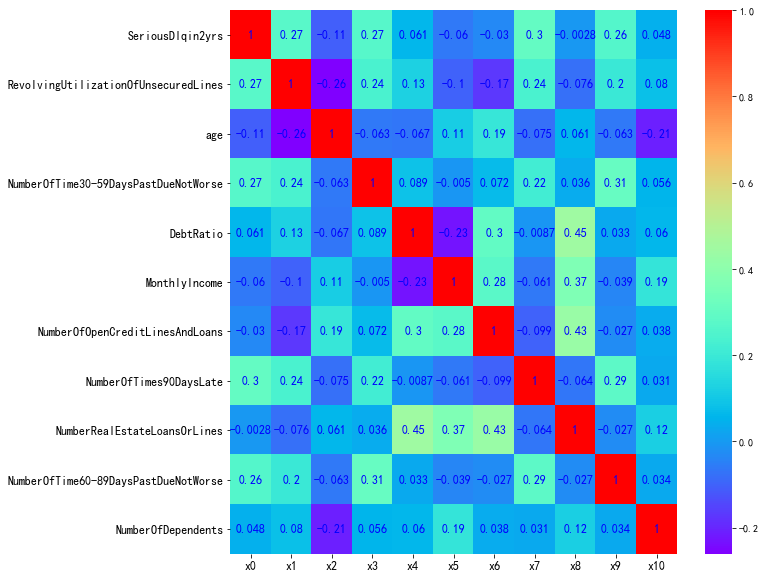

In [65]:
corr = train.corr() # 计算各变量的相关性系数
xticks = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10'] # x轴标签
yticks = list(corr.index) # y轴标签
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap='rainbow', ax=ax,
            annot_kws={'size': 12, 'weight': 'bold', 'color': 'blue'}) # 绘制相关性系数热力图
ax.set_xticklabels(xticks, rotation=0, fontsize=12)
ax.set_yticklabels(yticks, rotation=0, fontsize=12)
plt.show()

### 上图可以看出变量之间的相关性都较小，但是 NumberOfOpenCreditLinesAndLoans 和 NumberRealEstateLoansOrLines 相对来说较大为0.43

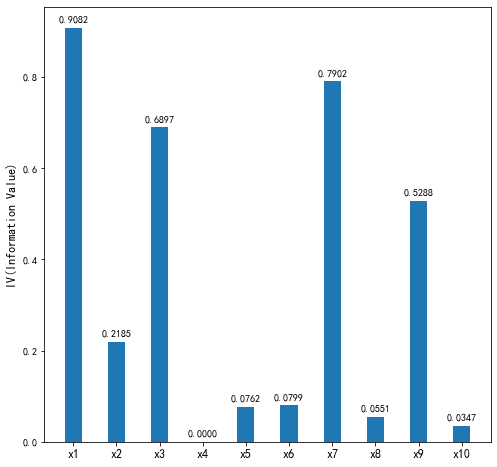

In [66]:
ivlist = [ivx1, ivx2, ivx3, ivx4, ivx5, ivx6, ivx7, ivx8, ivx9, ivx10] # 各变量IV
index = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10'] # x轴的标签
fig1 = plt.figure(figsize=(8, 8))
ax1 = fig1.add_subplot(1, 1, 1)
x = np.arange(len(index)) + 1
ax1.bar(x, ivlist, width=0.4) # 生成柱状图
ax1.set_xticks(x)
ax1.set_xticklabels(index, rotation=0, fontsize=12)
ax1.set_ylabel('IV(Information Value)', fontsize=12)
# 在柱状图上添加数字标签
for a, b in zip(x, ivlist):
    plt.text(a, b + 0.01, '%.4f' % b, ha='center', va='bottom', fontsize=10)
plt.show()

通过IV值判断变量预测能力的标准是：

**< 0.02: unpredictive**

**0.02 to 0.1: weak**

**0.1 to 0.3: medium**

**0.3 to 0.5: strong**

**> 0.5: suspicious**

DebtRatio、MonthlyIncome、NumberRealEstateLoansOrLines 和 NumberOfDependents 变量的IV值明显较低

### 模型分析
    WOE转换:
        证据权重（Weight of Evidence,WOE）转换可以将Logistic回归模型转变为标准评分卡格式

In [67]:
# 替换成woe函数
def replace_woe(series, cut, woe):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut)-2
        m = len(cut)-2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(woe[m])
        i += 1
    return list

In [70]:
from pandas import Series
train = pd.read_csv("./TrainData.csv")
train['RevolvingUtilizationOfUnsecuredLines'] = Series(replace_woe(train['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1))
train['age'] = Series(replace_woe(train['age'], cutx2, woex2))
train['NumberOfTime30-59DaysPastDueNotWorse'] = Series(replace_woe(train['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3))
train['DebtRatio'] = Series(replace_woe(train['DebtRatio'], cutx4, woex4))
train['MonthlyIncome'] = Series(replace_woe(train['MonthlyIncome'], cutx5, woex5))
train['NumberOfOpenCreditLinesAndLoans'] = Series(replace_woe(train['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6))
train['NumberOfTimes90DaysLate'] = Series(replace_woe(train['NumberOfTimes90DaysLate'], cutx7, woex7))
train['NumberRealEstateLoansOrLines'] = Series(replace_woe(train['NumberRealEstateLoansOrLines'], cutx8, woex8))
train['NumberOfTime60-89DaysPastDueNotWorse'] = Series(replace_woe(train['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9))
train['NumberOfDependents'] = Series(replace_woe(train['NumberOfDependents'], cutx10, woex10))
train.to_csv('WoeTrainData.csv', index=False)

In [71]:
test = pd.read_csv('TestData.csv')
# 替换成woe
test['RevolvingUtilizationOfUnsecuredLines'] = Series(replace_woe(test['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1))
test['age'] = Series(replace_woe(test['age'], cutx2, woex2))
test['NumberOfTime30-59DaysPastDueNotWorse'] = Series(replace_woe(test['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3))
test['DebtRatio'] = Series(replace_woe(test['DebtRatio'], cutx4, woex4))
test['MonthlyIncome'] = Series(replace_woe(test['MonthlyIncome'], cutx5, woex5))
test['NumberOfOpenCreditLinesAndLoans'] = Series(replace_woe(test['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6))
test['NumberOfTimes90DaysLate'] = Series(replace_woe(test['NumberOfTimes90DaysLate'], cutx7, woex7))
test['NumberRealEstateLoansOrLines'] = Series(replace_woe(test['NumberRealEstateLoansOrLines'], cutx8, woex8))
test['NumberOfTime60-89DaysPastDueNotWorse'] = Series(replace_woe(test['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9))
test['NumberOfDependents'] = Series(replace_woe(test['NumberOfDependents'], cutx10, woex10))
test.to_csv('WoeTestData.csv', index=False)

### 模型预测

In [73]:
from sklearn.model_selection import cross_val_score

def cvDictGen(functions, scr, X_train=X_train, Y_train=Y_train, cv=10):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, Y_train, cv=cv, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[list(cvDict.keys())[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[list(cvDict.keys())[0]][1]))]
    return cvDictNormalized

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [75]:
lrMod = LogisticRegression(penalty='l1', solver='liblinear')

In [76]:
adaMod = AdaBoostClassifier(n_estimators=200)

In [77]:
rfMod = RandomForestClassifier(n_estimators=100)

In [78]:
cvD = cvDictGen(functions=[lrMod, adaMod, rfMod], scr='roc_auc')

In [79]:
cvD

{'LogisticRegression': [0.8416603435766359, 0.008528036987048338],
 'AdaBoostClassifier': [0.8506702845990157, 0.006587538592917613],
 'RandomForestClassifier': [0.828335190644232, 0.007397550096806435]}

In [80]:
cvDictNormalize(cvD)

{'LogisticRegression': ['1.00', '1.00'],
 'AdaBoostClassifier': ['1.01', '0.77'],
 'RandomForestClassifier': ['0.98', '0.87']}

AdaBoost较好

### 最优化超参数

下面调参AdaBoost模型，随机森林模型

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [85]:
ada_param = {'n_estimators': [10,50,100,200,400],
                 'learning_rate': [0.1, 0.05]}

In [86]:
randomizedSearchAda = RandomizedSearchCV(
    estimator=adaMod, param_distributions=ada_param, scoring='roc_auc').fit(X_train, Y_train)

In [87]:
randomizedSearchAda.best_params_, randomizedSearchAda.best_score_

({'n_estimators': 400, 'learning_rate': 0.1}, 0.8524652604236937)

In [88]:
bestAdaModFitted = randomizedSearchAda.best_estimator_.fit(X_train, Y_train)

In [93]:
rf_param = {'n_estimators': [10, 30, 50, 70, 100],
            'max_depth': np.arange(1, 20)}

In [95]:
randomizedSearchRF = RandomizedSearchCV(
    estimator=rfMod, param_distributions=rf_param, scoring='roc_auc').fit(X_train, Y_train)

In [96]:
randomizedSearchRF.best_params_, randomizedSearchRF.best_score_

({'n_estimators': 100, 'max_depth': 9}, 0.8549864863654572)

In [97]:
bestRFModFitted = randomizedSearchRF.best_estimator_.fit(X_train, Y_train)

In [98]:
cvDictHPO = cvDictGen(
    functions=[bestAdaModFitted, bestRFModFitted], scr='roc_auc')

In [99]:
cvDictNormalize(cvDictHPO)

{'AdaBoostClassifier': ['1.00', '1.00'],
 'RandomForestClassifier': ['1.00', '0.86']}

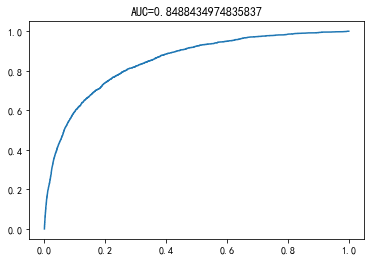

In [125]:
from sklearn.metrics import roc_curve, auc

probas = randomizedSearchAda.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, probas[:, 1])
area = auc(fpr, tpr)
plt.title('AUC={:.2f}'.format(area))
plt.plot(fpr, tpr)


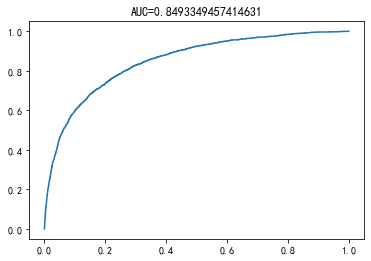

In [126]:
from sklearn.metrics import roc_curve, auc

probas = randomizedSearchRF.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, probas[:, 1])
area = auc(fpr, tpr)
plt.title('AUC={:.2f}'.format(area))
plt.plot(fpr, tpr)


In [131]:
lrMod.fit(X_train, Y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [132]:
lrMod.coef_

array([[ 1.69424584e+00, -2.23093333e-02,  4.24485139e-01,
         1.21193396e-02, -5.76733411e-05,  2.69032894e-02,
         6.46477549e-01,  1.41093985e-01,  6.30614251e-01,
         5.65010362e-02]])

LR模型

In [134]:
data = pd.read_csv('./WoeTrainData.csv')
#应变量
data_Y = data['SeriousDlqin2yrs']
#自变量，剔除对因变量影响不明显的变量
data_X = data.drop(['SeriousDlqin2yrs','DebtRatio','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
lrMod.fit(data_X, data_Y)

LogisticRegression(penalty='l1', solver='liblinear')

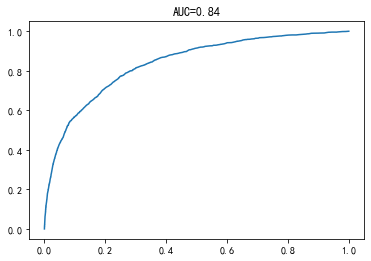

In [135]:
from sklearn.metrics import roc_curve, auc
data = pd.read_csv('./WoeTestData.csv')
#应变量
data_Y = data['SeriousDlqin2yrs']
#自变量，剔除对因变量影响不明显的变量
data_X = data.drop(['SeriousDlqin2yrs','DebtRatio','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
probas = lrMod.predict_proba(data_X)
fpr, tpr, _ = roc_curve(data_Y, probas[:, 1])
area = auc(fpr, tpr)
plt.title('AUC={:.2f}'.format(area))
plt.plot(fpr, tpr)


In [136]:
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
# 导入数据
data = pd.read_csv('./WoeTrainData.csv')
#应变量
Y = data['SeriousDlqin2yrs']
#自变量，剔除对因变量影响不明显的变量
X = data.drop(['SeriousDlqin2yrs','DebtRatio','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
# X = data.drop(['SeriousDlqin2yrs','DebtRatio','MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
X1 = sm.add_constant(X)
logit = sm.Logit(Y, X1)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.194123
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:                84118
Model:                          Logit   Df Residuals:                    84110
Method:                           MLE   Df Model:                            7
Date:                Thu, 20 Aug 2020   Pseudo R-squ.:                  0.2304
Time:                        22:44:33   Log-Likelihood:                -16329.
converged:                       True   LL-Null:                       -21218.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -8.8809      0.1

No handles with labels found to put in legend.


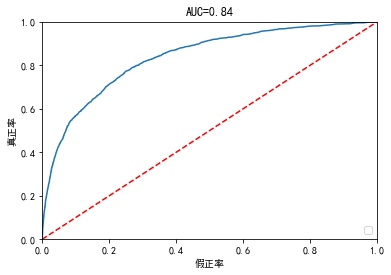

In [137]:
test = pd.read_csv('./WoeTestData.csv')
Y_test = test['SeriousDlqin2yrs']
# X_test = test.drop(['SeriousDlqin2yrs', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines', 'NumberOfDependents'], axis=1)
X_test = test.drop(['SeriousDlqin2yrs', 'DebtRatio', 'NumberRealEstateLoansOrLines', 'NumberOfDependents'], axis=1)
X3 = sm.add_constant(X_test)
resu = result.predict(X3)
fpr, tpr, threshold = roc_curve(Y_test, resu)
area = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('AUC={:.2f}'.format(area))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('真正率')
plt.xlabel('假正率')
plt.show()

In [138]:
lrMod.coef_ 

array([[0.6202146 , 0.48306411, 1.04259631, 0.37845357, 0.32675346,
        1.59539198, 0.99665003]])

In [139]:
import math
# coe为逻辑回归模型的系数
coe = [-8.8809, 0.6202146, 0.48306411, 1.04259631, 0.37845357, 0.32675346,
       1.59539198, 0.99665003]

p = 20 / math.log(2)
q = 600 - 20 * math.log(20) / math.log(2)
baseScore = round(q + p * coe[0], 0)

In [140]:
baseScore

257.0

In [141]:
def get_score(coe, woe, factor):
    scores = []
    for w in woe:
        score = round(coe * w * factor, 0)
        scores.append(score)
    return scores

In [142]:
x1 = get_score(coe[1], woex1, p)
x2 = get_score(coe[2], woex2, p)
x3 = get_score(coe[3], woex3, p)
x5 = get_score(coe[4], woex5, p)
x6 = get_score(coe[5], woex6, p)
x7 = get_score(coe[6], woex7, p)
x9 = get_score(coe[7], woex9, p)

In [143]:
print(x1, x2, x3, x5, x6, x7, x9)

[-22.0, -20.0, -5.0, 19.0] [7.0, 5.0, 4.0, 2.0, 2.0, -1.0, -5.0, -12.0, -15.0] [-16.0, 26.0, 50.0, 72.0, 75.0] [3.0, 3.0, 1.0, -1.0, -3.0, -5.0] [10.0, 4.0, 2.0, -0.0, -1.0] [-16.0, 89.0, 126.0, 147.0] [-8.0, 51.0, 77.0, 94.0]


In [144]:
def compute_score(series, cut, score):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut) - 2
        m = len(cut) - 2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(score[m])
        i += 1
    return list

In [145]:
test1 = pd.read_csv('TestData.csv')
test1['BaseScore'] = Series(np.zeros(len(test1))) + baseScore
test1['x1'] = Series(compute_score(test1['RevolvingUtilizationOfUnsecuredLines'], cutx1, x1))
test1['x2'] = Series(compute_score(test1['age'], cutx2, x2))
test1['x3'] = Series(compute_score(test1['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, x3))
test1['x5'] = Series(compute_score(test1['MonthlyIncome'], cutx5, x5))
test1['x6'] = Series(compute_score(test1['NumberOfOpenCreditLinesAndLoans'], cutx6, x6))
test1['x7'] = Series(compute_score(test1['NumberOfTimes90DaysLate'], cutx7, x7))
test1['x9'] = Series(compute_score(test1['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, x9))
test1['Score'] = test1['x1'] + test1['x2'] + test1['x3'] + test1['x7'] +test1['x9']  + baseScore
test1.to_csv('ScoreData.csv', index=False)

In [146]:
ScoreData = pd.read_csv("ScoreData.csv")

In [147]:
ScoreData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36051 entries, 0 to 36050
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      36051 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  36051 non-null  float64
 2   age                                   36051 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  36051 non-null  float64
 4   DebtRatio                             36051 non-null  float64
 5   MonthlyIncome                         36051 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       36051 non-null  int64  
 7   NumberOfTimes90DaysLate               36051 non-null  float64
 8   NumberRealEstateLoansOrLines          36051 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  36051 non-null  float64
 10  NumberOfDependents                    36051 non-null  float64
 11  BaseScore      

In [148]:
ScoreData[ScoreData.SeriousDlqin2yrs == 0]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,BaseScore,x1,x2,x3,x5,x6,x7,x9,Score
1,0,0.000000,57,1.0,0.252606,2493.0,4,0.0,0,0.0,0.0,257.0,-22.0,-1.0,50.0,3.0,-0.0,89.0,51.0,424.0
2,0,0.391314,59,0.0,0.505475,6666.0,14,0.0,2,0.0,0.0,257.0,-5.0,-5.0,26.0,-1.0,-1.0,89.0,51.0,413.0
3,0,1.015857,41,0.0,0.477904,5000.0,6,2.0,2,0.0,0.0,257.0,19.0,4.0,26.0,1.0,-1.0,126.0,51.0,483.0
4,0,0.442614,57,0.0,0.570921,5350.0,16,0.0,1,0.0,2.0,257.0,-5.0,-1.0,26.0,1.0,-1.0,89.0,51.0,417.0
5,0,0.068379,61,0.0,0.270526,7392.0,8,0.0,2,0.0,0.0,257.0,-20.0,-5.0,26.0,-3.0,-1.0,89.0,51.0,398.0
